#Importing Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading Data
Data uploaded from local drive

In [90]:
from google.colab import files
uploaded = files.upload()

Saving bank_marketing_updated_v1.csv to bank_marketing_updated_v1 (1).csv


In [91]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank_marketing_updated_v1.csv']), skiprows=2)
# Dataset is now stored in a Pandas Dataframe

In [92]:
#Viewing the first 5 rows of the data
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,1,"management,tertiary",1,0,1,0,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,0.0
1,2,44.0,60000,29,0,"technician,secondary",1,0,1,0,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,0.0
2,3,33.0,120000,2,1,"entrepreneur,secondary",1,0,1,1,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,0.0
3,4,47.0,20000,1506,1,"blue-collar,unknown",0,0,1,0,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,0.0
4,5,33.0,0,1,0,"unknown,unknown",0,0,0,0,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,0.0


#Data Cleaning

1.   Maintain only columns that have a significant impact in analysing the data.
2.   Split columns with combined values if each value in it is impactful (eg: "jobedu")



In [93]:
#customerid does not impact the data analysis, hence we remove the same
df.drop('customerid', axis=1, inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,1,"management,tertiary",1,0,1,0,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,0.0
1,44.0,60000,29,0,"technician,secondary",1,0,1,0,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,0.0
2,33.0,120000,2,1,"entrepreneur,secondary",1,0,1,1,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,0.0
3,47.0,20000,1506,1,"blue-collar,unknown",0,0,1,0,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,0.0
4,33.0,0,1,0,"unknown,unknown",0,0,0,0,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,0.0


In [94]:
# Split "jobedu" into "job" and "education"
df['job'] = df.jobedu.apply(lambda x: x.split(",")[0])
df["education"] = df.jobedu.apply(lambda x: x.split(",")[1])
df.drop('jobedu', axis=1, inplace=True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,1,1,0,1,0,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,0.0,management,tertiary
1,44.0,60000,29,0,1,0,1,0,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,0.0,technician,secondary
2,33.0,120000,2,1,1,0,1,1,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,0.0,entrepreneur,secondary
3,47.0,20000,1506,1,0,0,1,0,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,0.0,blue-collar,unknown
4,33.0,0,1,0,0,0,0,0,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,0.0,unknown,unknown


#Handling missing values

In [95]:
#Find number of null values in each column
print("Number of null values in each column: \n")
df.isnull().sum()


Number of null values in each column: 



age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [96]:
print("\n Total number of null values in the dataset: ")
df.isnull().sum().sum()


 Total number of null values in the dataset: 


100

##Age
Remove all rows with age not available. Since only 20 rows don't have age and our data set is large, we can afford to remove.

In [97]:
# 'df.age.isnull()' returns whether each rows have null value for age
# 'df[df.age.isnull()]' returns data frame rows with null value for age (20 rows)
# 'df[~df.age.isnull()]' returns only the data frame rows which has a value for age
df = df[~df.age.isnull()] #Hence, we removed rows that don't have age values
df.shape

(45191, 19)

In [98]:
print("Number of null age values in updated data frame: ")
df.age.isnull().sum()

Number of null age values in updated data frame: 


0

##Month
Replace the values of month with the value with most number of occurences (mode value)

In [99]:
#Fill the first element in month (month column contains both month and year) with mode value from the column if the month value is null
df.month = df.month.fillna(df.month.mode()[0])
df.month.isnull().sum()

0

##Response
Remove all rows with null values

In [116]:
df = df[~df.response.isnull()] #We removed rows that don't have age values
print("Number of null age values in updated data frame: ")
df.response.isnull().sum()

Number of null age values in updated data frame: 


0

#Handling Outliers

#Exploring values

## All available data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


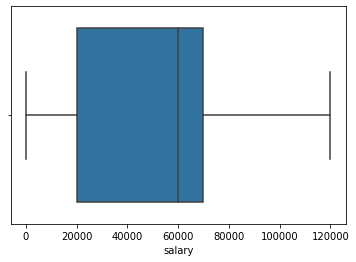

In [117]:
sns.boxplot(df.salary)


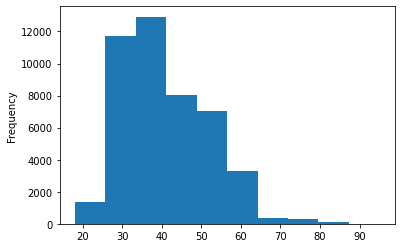

In [101]:
df.age.plot.hist()

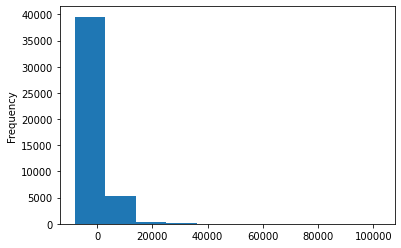

In [102]:
df.balance.plot.hist()

## Data regarding customers who opened a term deposit account

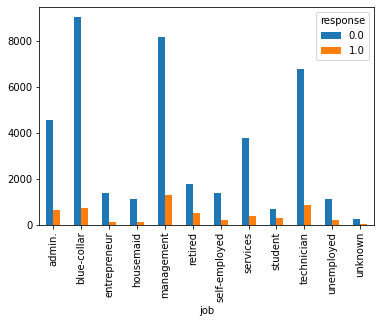

In [103]:
df_plot=df.groupby(['job','response']).size()
df_plot=df_plot.unstack()
df_plot.plot(kind='bar')

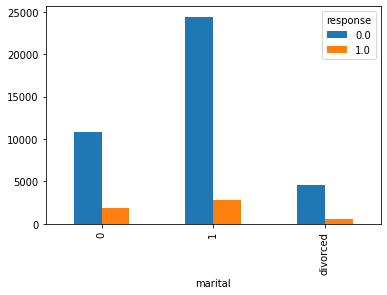

In [104]:
df_plot=df.groupby(['marital','response']).size()
df_plot=df_plot.unstack()
df_plot.plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


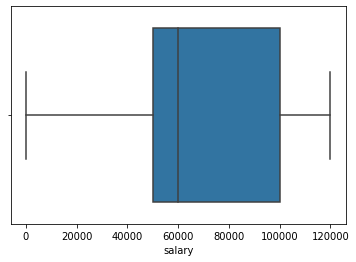

In [105]:
trial = df[df.response == 1]
sns.boxplot(trial.salary)

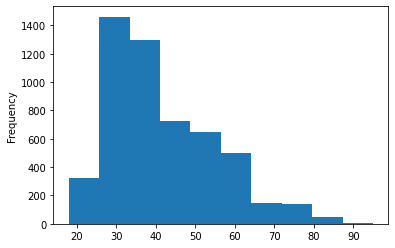

In [106]:
trial = df[df.response == 1]

trial.age.plot.hist()

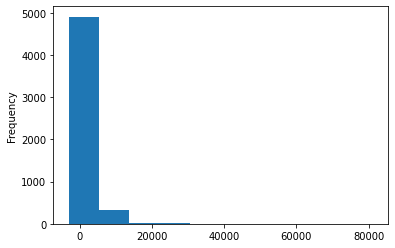

In [107]:
trial = df[df.response == 1]

trial.balance.plot.hist()

EDA Conclusion:
1. There may be a correlation between Age, Salary, Job of the customer and the possibility of them starting a term account.
2. There seems to be no correlation between Balance of the customer's account, marital status and the possibility of them starting a term account.

# Model to predict whether a customer of certain characteristics will start a term deposit or not.
Since there seems to be valid correlation between certain varialbles from the above dataset and likelihood of the customer starting a term deposit, we can try to predict the same using a model.
Since, this is a "Yes" or "No" classification, we'll try different classification algorithms.

##Seperating X and y from the dataframe & test train split


In [118]:
from sklearn.model_selection import train_test_split

df_features = ['age', 'salary', 'housing', 'loan', 'campaign']
X = df[df_features]
X.head()


,age,salary,housing,loan,campaign
0,58.0,100000,1,0,1
1,44.0,60000,1,0,1
2,33.0,120000,1,1,1
3,47.0,20000,1,0,1
4,33.0,0,0,0,1


In [119]:
y = df.response
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: response, dtype: float64

In [120]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

## Decision Tree classifier model

In [121]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier_model = DecisionTreeClassifier(random_state=0)
tree_classifier_model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

In [122]:
val_prediction = tree_classifier_model.predict(val_X)
print(val_prediction)

[0. 0. 0. ... 0. 0. 0.]


In [125]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y, val_prediction))

0.13116641572934196


##Random Forest regressor

In [127]:
from sklearn.ensemble import RandomForestRegressor
forest_classifier_model = DecisionTreeClassifier(random_state=0)
forest_classifier_model.fit(train_X, train_y)
forest_val_prediction = forest_classifier_model.predict(val_X)
print(forest_val_prediction)
print(mean_absolute_error(val_y, forest_val_prediction))

[0. 0. 0. ... 0. 0. 0.]
0.13116641572934196


##Logistic regression model

In [126]:
from sklearn.linear_model import LogisticRegression
logistic_classifier_model = LogisticRegression(random_state=0)
logistic_classifier_model.fit(train_X, train_y)
log_val_prediction = logistic_classifier_model.predict(val_X)
print(log_val_prediction)
print(mean_absolute_error(val_y, log_val_prediction))

[0. 0. 0. ... 0. 0. 0.]
0.11823576299707732
